### <center> Simulacion Trace-Driven </center>

Se usan los valores de los datos en si mismos para conducir la simulacion.

### 1. Librerias Necesarias

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### 2. Entradas Conocidas

In [3]:
df = pd.read_excel('DatosParaPython.xlsx', sheet_name='Datos')

### 3. Variables de decision
En este modelo en particulasr no hacemos uso de variables

### 4. Entradas Incientas
Cadauno de los valores de ls vectores y costos 

### 5. Calculos Intermedios

In [4]:
df["Beneficios"]= df["Ventas"]-df["Costos"]

### 6. Salidas

In [5]:
beneficio_out = df["Beneficios"]


### 7. Resumen 
### **7.1 Podemos hacer un resumen estadistico basico con `pandas`**

In [7]:
print(round(pd.DataFrame(beneficio_out, columns=["Beneficios"]).describe(),2))

       Beneficios
count      500.00
mean        20.79
std         25.21
min        -45.11
25%          4.16
50%         20.35
75%         36.58
max        109.14


### **7.2 Podemos hacer un resumen estadistico basico con `scipy.stats.describe`**

In [15]:
from scipy.stats import describe

resumen = describe(beneficio_out, ddof=0)

print("Numero de observaciones: ", resumen.nobs)
minimo, maximo = resumen.minmax
print(f'Minimo y Maximo:({minimo:.2f}, {maximo:.2f})')
print("Media: ", resumen.mean)
print("Varianza: ", resumen.variance)
print("Desviacion: ", np.sqrt(resumen.variance))


Numero de observaciones:  500
Minimo y Maximo:(-45.11, 109.14)
Media:  20.78743885296717
Varianza:  634.3981079625644
Desviacion:  25.187260826905423


### **7.3 Podemos hacer un resumen estadistico basico con `numpy`**

In [16]:
resumennp = {
    "Media": np.mean(beneficio_out),
    "Mediana": np.median(beneficio_out),
    "Desviacion estandar": np.std(beneficio_out, ddof=1),
    "Varianza": np.var(beneficio_out),
    "Minimo": np.min(beneficio_out),
    "Maximo": np.max(beneficio_out),
    "Rango": np.ptp(beneficio_out),
    "Percentil 25": np.percentile(beneficio_out, 25),
    "Percentil 50": np.percentile(beneficio_out, 50),
    "Percentil 75": np.percentile(beneficio_out, 75),
}

for clave, valor in resumennp.items():
    print(f'{clave}: {valor:.2f}')


Media: 20.79
Mediana: 20.35
Desviacion estandar: 25.21
Varianza: 634.40
Minimo: -45.11
Maximo: 109.14
Rango: 154.25
Percentil 25: 4.16
Percentil 50: 20.35
Percentil 75: 36.58


### 7.4 Calculo basico de probabilidades 

In [17]:
#Probabilidad de que el beneficio sea negativo
condicion= (beneficio_out<0)
prob1 = np.sum(condicion)/len(beneficio_out)
print(f'Probabilidad de que el beneficio sea negativo: {prob1:.2f}')

Probabilidad de que el beneficio sea negativo: 0.20


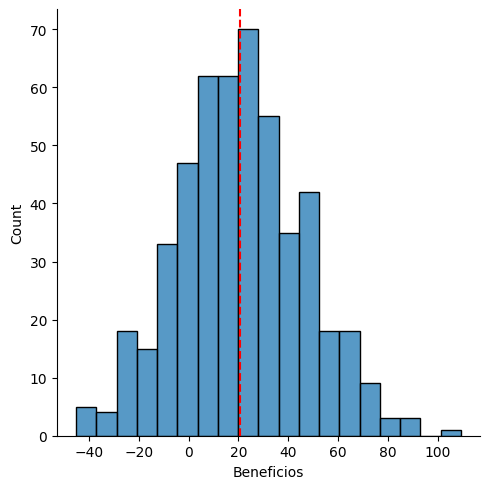

In [19]:
sns.displot(beneficio_out)
plt.axvline(np.mean(beneficio_out), color='red', linestyle='--')

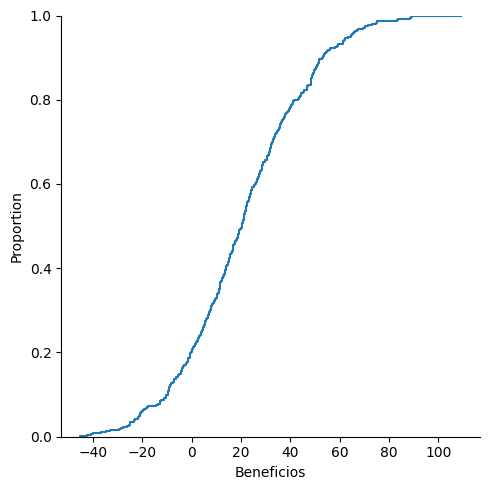

In [20]:
sns.displot(beneficio_out, kind='ecdf')